In [1]:
%pwd

'C:\\Users\\dell\\Documents'

In [8]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
trainData=pd.read_csv(r"C:\Users\dell\Documents\train.csv")
testData=pd.read_csv(r"C:\Users\dell\Documents\test.csv")

In [5]:
os.path.abspath('train.csv')
os.path.dirname('C:\\Users\\dell\\Documents\test.csv')

'C:\\Users\\dell'

In [11]:
os.walk(r'C:\Users\dell\Documents')

<generator object walk at 0x00000144B5A5C1C8>

In [3]:
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
testData=pd.read_csv(r"C:\Users\dell\Documents\test.csv")
print(testData.info())
testData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
trainData.info()
sum(trainData['Survived'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


342

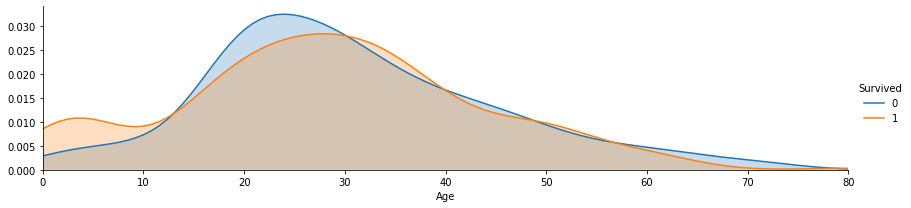

In [6]:
###Age,Cabin,Embarked are the factors with nulls,now let's see if these factors are important.
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator,FormatStrFormatter
##Age
facet = sns.FacetGrid(trainData, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, trainData['Age'].max()))
facet.add_legend()

,Survived
cabinFirstLetter,
A,7
B,35
C,35
D,25
E,24
F,8
G,2
T,0
X,206


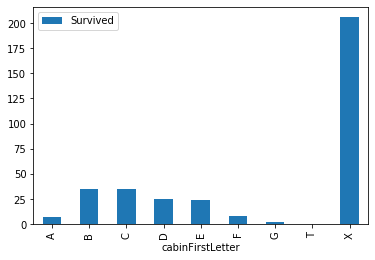

In [7]:
##Cabin
import re
trainData['Cabin' ][trainData['Cabin'].isnull()]='X'
trainData['cabinFirstLetter']=trainData['Cabin'].map(lambda x:x[0])
trainData[['Survived','cabinFirstLetter']].groupby(['cabinFirstLetter']).sum().plot.bar()
trainData[['Survived','cabinFirstLetter']].groupby(['cabinFirstLetter']).sum()

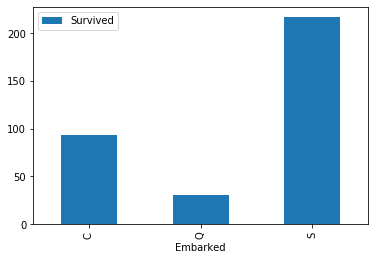

In [8]:
##Embarked
trainData[['Embarked','Survived']].groupby(trainData['Embarked']).sum().plot.bar()

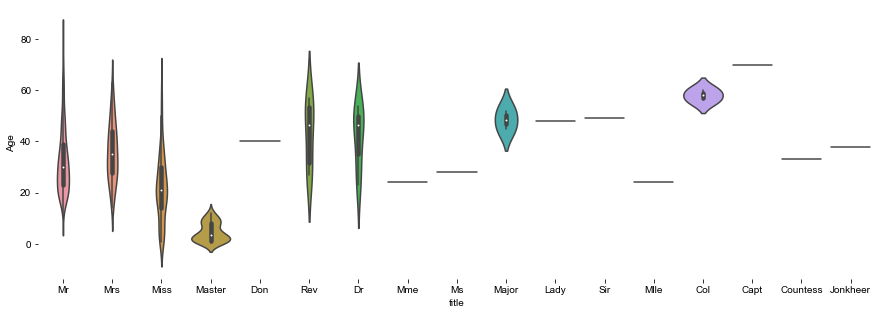

In [9]:
##CANNOT drop Age,Embarked! Now fill the nulls

##predict age 
####draw title from name
trainData['title']=trainData['Name'].str.extract('([A-Za-z]+)\.',expand=False)
##see the relationship between age,pclass,fare and title

f, ax = plt.subplots(figsize=(15,5))
sns.despine(f, left=True, bottom=True)
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.violinplot(x="title", y="Age",data=trainData)

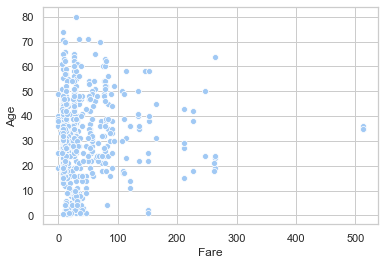

In [10]:
sns.scatterplot(x='Fare',y='Age',data=trainData)

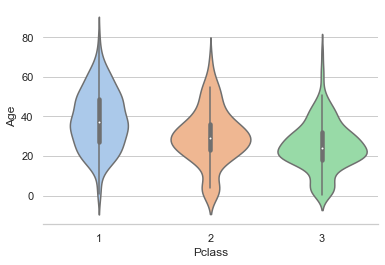

In [11]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.violinplot(x="Pclass", y="Age",data=trainData)
sns.despine(left=True)

In [12]:
testData['Survived']=1
train_test=trainData.append(testData)
print(train_test.iloc[0])
print(train_test.info())
train_test.head()

PassengerId                               1
Survived                                  0
Pclass                                    3
Name                Braund, Mr. Owen Harris
Sex                                    male
Age                                      22
SibSp                                     1
Parch                                     0
Ticket                            A/5 21171
Fare                                   7.25
Cabin                                     X
Embarked                                  S
cabinFirstLetter                          X
title                                    Mr
Name: 0, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       1309 non-null   int64  
 1   Survived          1309 non-null   int64  
 2   Pclass            1309 non-null   int64  
 3   Name           

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabinFirstLetter,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,X,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,X,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,X,Mr


In [13]:
##numerical analysis about the relationship between age and other foctors
AgePre=pd.DataFrame()
train_test['Cabin' ][train_test['Cabin'].isnull()]='X'
train_test['cabinFirstLetter']=train_test['Cabin'].map(lambda x:x[0])
AgePre=train_test[['cabinFirstLetter','title','Parch','SibSp','Pclass','Sex','Fare','Age']]
##AgePre['cabinFirstLetter']=AgePre.loc[AgePre['cabinFirstLetter']!='X','cabinFirstLetter']
AgePre['cabinFirstLetter']=pd.factorize(AgePre['cabinFirstLetter'])[0]
AgePre['title']=pd.factorize(AgePre['title'])[0]
AgePre['Sex']=pd.factorize(AgePre['Sex'])[0]
AgeCorrDf=pd.DataFrame()
AgeCorrDf=AgePre.corr()
print(len(train_test['cabinFirstLetter']))
AgeCorrDf['Age'].sort_values()

1309


Pclass             -0.408106
SibSp              -0.243699
Parch              -0.150917
Sex                -0.063645
title              -0.063000
Fare                0.178740
cabinFirstLetter    0.196669
Age                 1.000000
Name: Age, dtype: float64

In [14]:
###fill the missing values in Embarked  with public number
train_test['Embarked'].fillna(train_test['Embarked'].mode().iloc[0],inplace=True)

In [15]:
train_test['title']=train_test['Name'].str.extract('([A-Za-z]+)\.',expand=False)
train_test['title']=pd.factorize(train_test['title'])[0]

In [16]:
train_test['Sex']=pd.factorize(train_test['Sex'])[0]

In [17]:
train_test['cabinFirstLetter']=pd.factorize(train_test['cabinFirstLetter'])[0]
train_test['Embarked']=pd.factorize(train_test['Embarked'])[0]

In [18]:
###fillna with mean in cabin
train_test['Fare'] = train_test[['Fare']].fillna(train_test.groupby('Pclass').transform(np.mean))
AgePre=train_test[['Pclass','SibSp','Parch','Fare','cabinFirstLetter','Age']] 
Age_Train=AgePre[AgePre['Age'].notnull()]
Age_Test=AgePre[AgePre['Age'].isnull()]
Age_Train_col=Age_Train.drop(['Age'],axis=1)
Age_Train_result=Age_Train['Age']
AgePre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            1309 non-null   int64  
 1   SibSp             1309 non-null   int64  
 2   Parch             1309 non-null   int64  
 3   Fare              1309 non-null   float64
 4   cabinFirstLetter  1309 non-null   int64  
 5   Age               1046 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 71.6 KB


In [19]:
###using Ranadom Forest predict age,variables involved:Pclass,SibSp,Parch,Sex
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor  

rfr=RandomForestRegressor(random_state=None,n_estimators=500,n_jobs=-1)
rfr.fit(Age_Train_col,Age_Train_result)
Age_Test_col=Age_Test.drop(['Age'],axis=1)
Age_Test_result=rfr.predict(Age_Test_col)
rfr.score(Age_Train_col,Age_Train_result)
train_test.loc[train_test['Age'].isnull(),'Age']=Age_Test_result

###can try the mfixrep process https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#missing1
###can try breaking into agebands to decrease the effect of inaccurate prediction

In [20]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       1309 non-null   int64  
 1   Survived          1309 non-null   int64  
 2   Pclass            1309 non-null   int64  
 3   Name              1309 non-null   object 
 4   Sex               1309 non-null   int64  
 5   Age               1309 non-null   float64
 6   SibSp             1309 non-null   int64  
 7   Parch             1309 non-null   int64  
 8   Ticket            1309 non-null   object 
 9   Fare              1309 non-null   float64
 10  Cabin             1309 non-null   object 
 11  Embarked          1309 non-null   int64  
 12  cabinFirstLetter  1309 non-null   int64  
 13  title             1309 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 153.4+ KB


In [21]:
train_test=train_test[['Pclass','SibSp','Parch','Fare','cabinFirstLetter','Age','Sex','title','Survived','PassengerId']]
testset=train_test[891:1309]
trainset=train_test[:891]

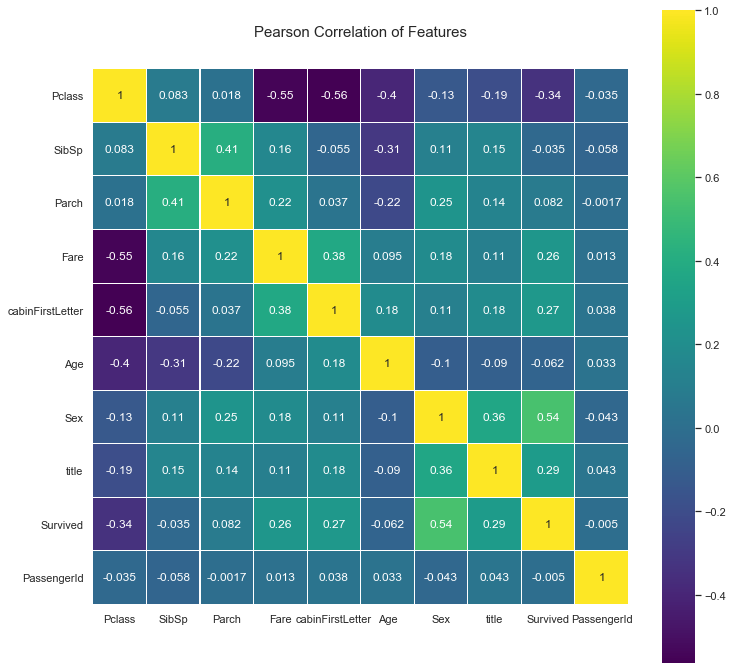

In [22]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(trainset.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [23]:
###incase factors are too much for sample set, decrease the factors involved to:Pclass,title,Sex,cabinFirstLetter,Fare
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
trainset=trainset[['Pclass','title','Sex','cabinFirstLetter','Fare','Survived','PassengerId']]
testset=testset[['Pclass','title','Sex','cabinFirstLetter','Fare','Survived','PassengerId']]
#####searching for best max_depth incase of overfitting   using cross validation
cv = KFold(n_splits=10)            
accuracies = list()
max_attributes = len(trainset.drop(['PassengerId'],axis=1).columns)
depth_range = range(1, max_attributes + 1)

for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)
    for train_fold, valid_fold in cv.split(trainset.drop(['PassengerId'],axis=1)):
        f_train = trainset.drop(['PassengerId'],axis=1).loc[train_fold]
        f_valid = trainset.drop(['PassengerId'],axis=1).loc[valid_fold] 
        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train["Survived"]) 
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"])
        fold_accuracy.append(valid_acc)
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.782285
         2          0.789076
         3          0.823808
         4          0.823808
         5          0.810412
         6          0.810387


In [24]:
####choose max_depth as 4,now build the decison tree model
y_train = trainset['Survived']
x_train = trainset.drop(['Survived'], axis=1).values 
x_test = testset.drop(['Survived'], axis=1).values

decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
tree_set=decision_tree.fit(x_train, y_train)

# Predicting results for test dataset
y_pred = decision_tree.predict(x_test)

submission = pd.DataFrame({
        "PassengerId": testset['PassengerId'],
        "Survived": y_pred
    })
submission.to_csv('submission.csv', index=False)

In [25]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

84.18

In [26]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 9.8 KB


In [ ]:
##try combine family info
##cabin info=cabin_first_letter+cabin_number_group

In [28]:
#!pip install pydotplus
#!pip install graphviz
#import graphviz # doctest: +SKIP
#dot_data = tree.export_graphviz(tree_set, out_file=None) # doctest: +SKIP
#graph = graphviz.Source(dot_data) # doctest: +SKIP
 # doctest: +SKIP


#dot_data = tree.export_graphviz(tree_set, out_file=None, # doctest: +SKIP
 #                           feature_names=testset.columns,  # doctest: +SKIP
  #                          class_names='Survived',  # doctest: +SKIP
   #                         filled=True, rounded=True,  # doctest: +SKIP
    #                        special_characters=True)  # doctest: +SKIP
#graph = graphviz.Source(dot_data)  # doctest: +SKIP
#graph # doctest: +SKIP

In [ ]:
##grid choosing characters siginificantly involved, global-parameters

In [ ]:
##gridsearchCV (for searching best parameter)
from sklearn.model_selection import GridSearchCV
 
#parameters to choose from
param_grid = {"gamma":[0.001,0.01,0.1,1,10,100],
             "C":[0.001,0.01,0.1,1,10,100]}
print("Parameters:{}".format(param_grid))
dict_param={}
def get_best_param(models,param_grid,traincol,trainTarget):
    for model in models:
        grid_search = GridSearchCV(model,param_grid,cv=5) 
        X_train,X_test,y_train,y_test = train_test_split(traincol,trainTarget,random_state=10)
        grid_search.fit(X_train,y_train) 
        print("Best parameters:{} for {}".format(grid_search.best_params_,model))
        dict_param[model]=grid_search.best_params
        print("Best score on train set:{:.2f}".format(grid_search.best_score_))
    return dict_param


In [ ]:
###stacking
#####firstly:k-fold and predict using models in first level

def get_kfold_predict(clf,x_train,y_train,x_test):
    for i, (train_fold,test_fold) in enumerate(cv.split(trainset.drop(['Survived'],axis=1)):
        x_train_fold=trainset.drop(['Survived'],axis=1).loc[train_fold]
        y_train_fold=trainset['Survived'].loc[train_fold]
        x_test_fold=trainset.drop(['Survived'],axis=1).loc[test_fold]
        clf.fit(x_train_fold,y_train_fold)
        train_model_predict.loc[test_fold]=clf.predict(x_test_fold)
        test_ifold_model_predict[i,:]=clf.predict(testset.drop(['Survived'],axis=1))
    test_fold_model_predict=test_ifold_model_predict.mean(axis=0)
    return train_model_predict.reshape(-1,1),test_fold_model_predict.reshape(-1,1)                                     

In [ ]:
###use grid search to find best paramter
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

rf = RandomForestClassifier(n_estimators=500, warm_start=True, max_features='sqrt',max_depth=6, 
                            min_samples_split=3, min_samples_leaf=2, n_jobs=-1, verbose=0)

ada = AdaBoostClassifier(n_estimators=500, learning_rate=0.1)

gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.008, min_samples_split=3, min_samples_leaf=2, max_depth=5, verbose=0)

rf_oof_train, rf_oof_test = get_kfold_predict(rf, x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_kfold_predict(ada, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_kfold_predict(gb, x_train, y_train, x_test) # Gradient Boost

x_train = np.concatenate((rf_oof_train, ada_oof_train, gb_oof_train), axis=1)
x_test = np.concatenate((rf_oof_test, ada_oof_test, gb_oof_test), axis=1)

from xgboost import XGBClassifier

gbm = XGBClassifier( n_estimators= 2000, max_depth= 4, min_child_weight= 2, gamma=0.9, subsample=0.8, 
                     colsample_bytree=0.8, objective= 'binary:logistic', nthread= -1, scale_pos_weight=1).fit(x_train, y_train)
predictions = gbm.predict(x_test)
StackingSubmission = pd.DataFrame({'PassengerId': PassengerId, 'Survived': predictions})
StackingSubmission.to_csv('StackingSubmission.csv',index=False,sep=',')